<a href="https://colab.research.google.com/github/DrakeData/House_Price_EDA/blob/main/MSDS422_Assignment3_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - House Prices: Advanced Regression Techniques (Continued)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn import preprocessing
from numpy import array
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline
sns.set()

## Ingest
Here I will be ingesting the data that I cleaned up in assignment 1. The code for this cleanup process can be in [MSDS422_Assignment1.ipynb](https://github.com/DrakeData/House_Price_EDA/blob/main/MSDS422_Assignment1.ipynb).

### Import Data
'train_clean.csv' and 'test_clean.csv' is the cleaned up trained data set that worked on in Assignment 1.

In [2]:
df_train = pd.read_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/data/train_clean.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSqft,TotalBath,HouseAge,ReModeled
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,2566,3.5,5,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,0,1262,0,1,2,0,3,1,TA,6,Typ,1,3,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,2524,2.5,31,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,3,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,2706,3.5,7,1
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,4,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,2473,2.0,91,1
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,3343,3.5,8,0


In [3]:
df_test = pd.read_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/data/test_clean.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSqft,TotalBath,HouseAge,ReModeled
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,1778.0,1.0,49,0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,2658.0,1.5,52,0
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,3,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,2557.0,2.5,13,1
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,4,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,2530.0,2.5,12,0
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,2560.0,2.0,18,0


## EDA
Before we pass the data through a model, we should explore the data and see if there is any additional work that needs to be done to it.

#### Train Set Check

In [4]:
df_train.shape

(1458, 85)

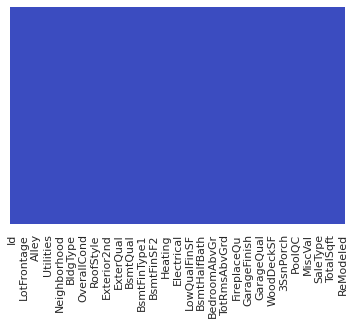

In [5]:
# Heatmap check for nulls in train set
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

In [6]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

In [7]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallC

#### Test Set Check
It is good practice to check the test set to verify that it did not contain any additional null values in different columns compared to the train set.

In [8]:
df_test.shape

(1459, 84)

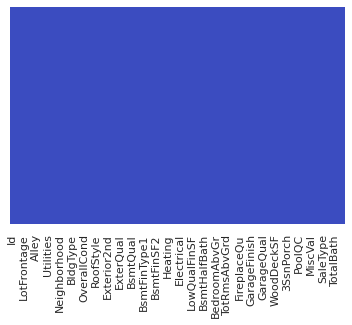

In [9]:
# Heatmap check for nulls in train set
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='coolwarm');

In [10]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 84 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Check for skewness in the train data set

In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

dataset_numeric = df_train.select_dtypes(include=numerics)

dataset_numeric.shape

(1458, 43)

In [12]:
dataset_numeric.skew()

Id                0.000165
MSSubClass        1.407011
LotFrontage       1.494021
LotArea          12.573925
OverallQual       0.200786
OverallCond       0.691035
YearBuilt        -0.612295
YearRemodAdd     -0.501838
MasVnrArea        2.696329
BsmtFinSF1        0.764789
BsmtFinSF2        4.251925
BsmtUnfSF         0.920903
TotalBsmtSF       0.511703
1stFlrSF          0.887637
2ndFlrSF          0.812957
LowQualFinSF      9.004955
GrLivArea         1.010992
BsmtFullBath      0.590358
BsmtHalfBath      4.100114
FullBath          0.031271
HalfBath          0.680051
BedroomAbvGr      0.212325
KitchenAbvGr      4.484883
TotRmsAbvGrd      0.660502
Fireplaces        0.632060
FireplaceQu       0.115596
GarageYrBlt      -0.693237
GarageCars       -0.342377
GarageArea        0.131748
WoodDeckSF        1.545805
OpenPorchSF       2.339829
EnclosedPorch     3.087164
3SsnPorch        10.297106
ScreenPorch       4.118929
PoolArea         15.948945
MiscVal          24.460085
MoSold            0.215432
Y

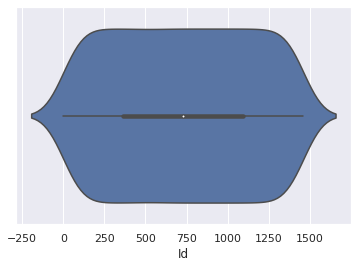

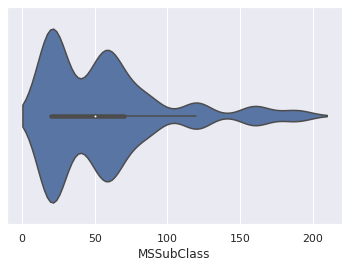

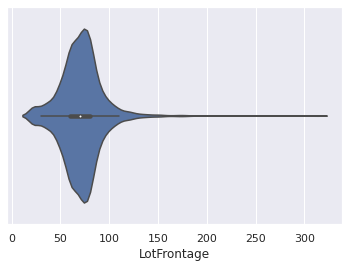

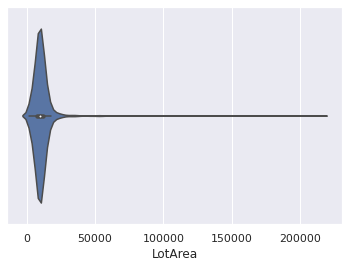

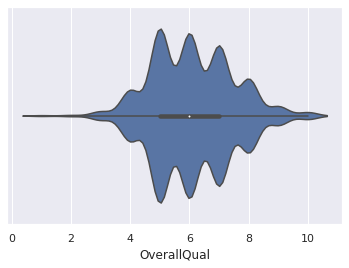

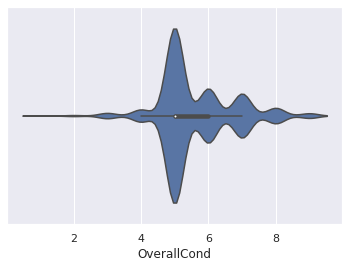

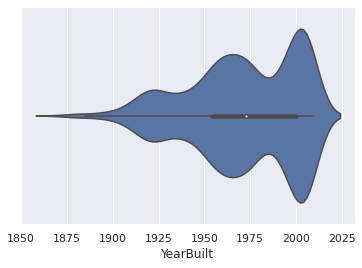

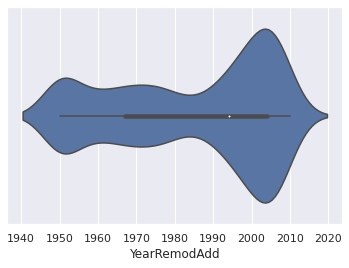

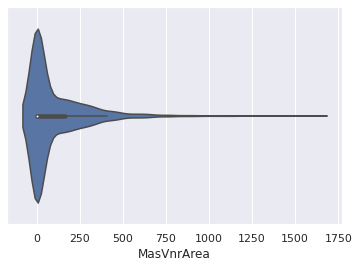

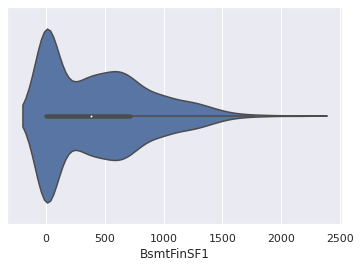

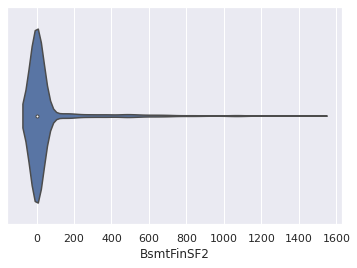

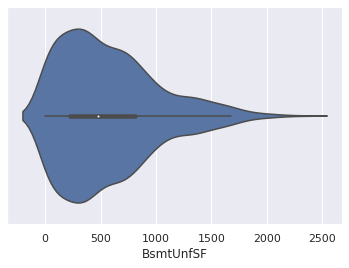

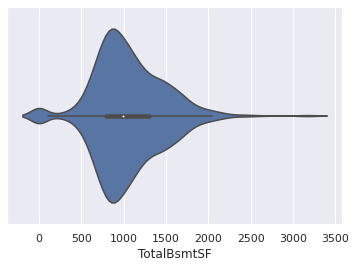

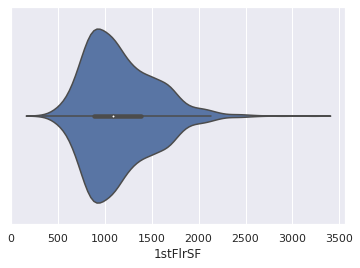

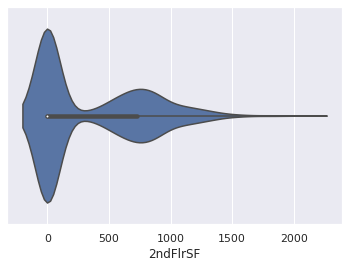

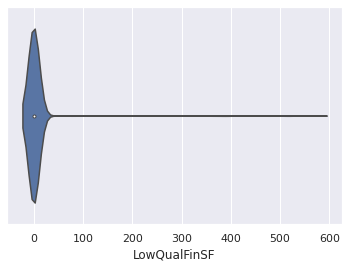

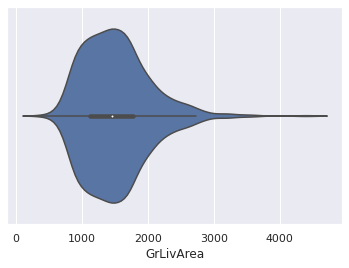

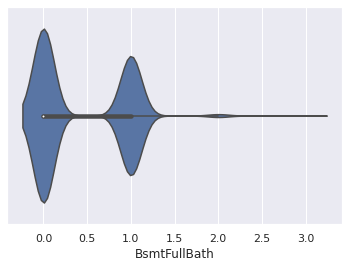

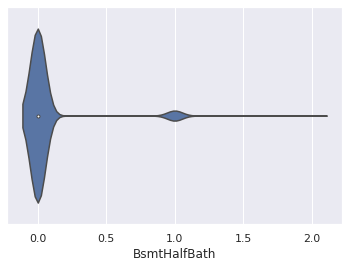

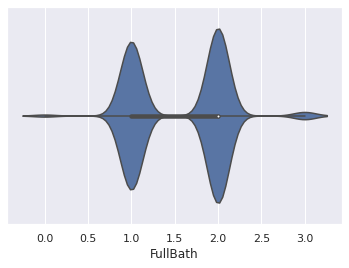

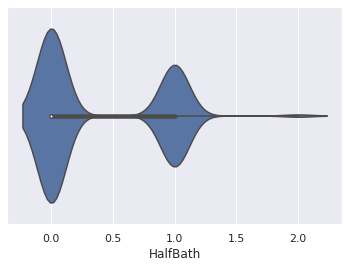

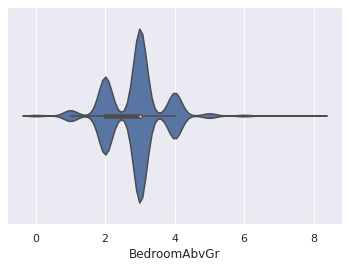

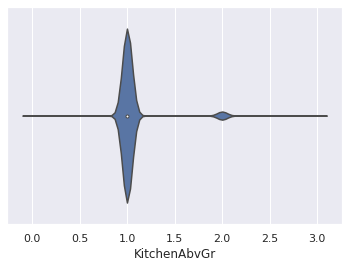

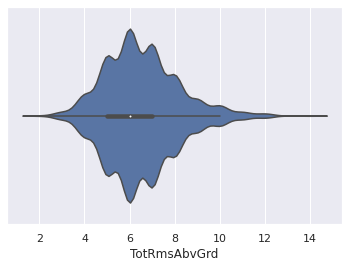

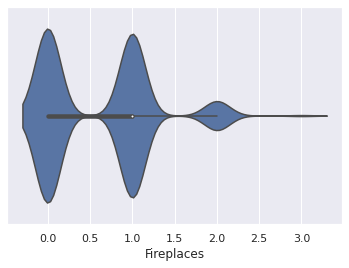

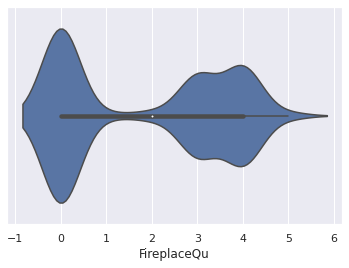

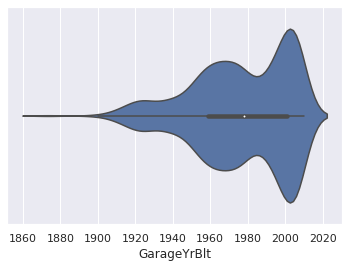

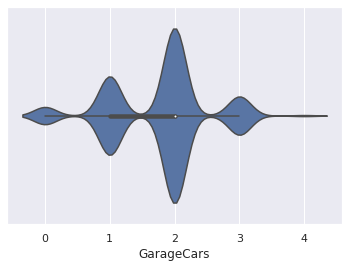

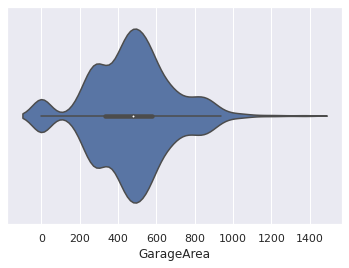

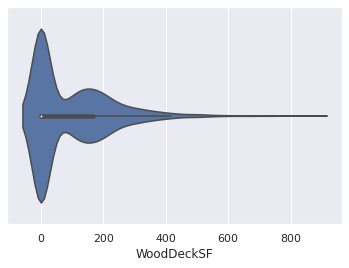

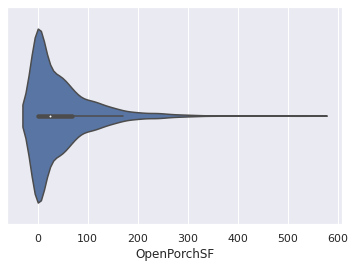

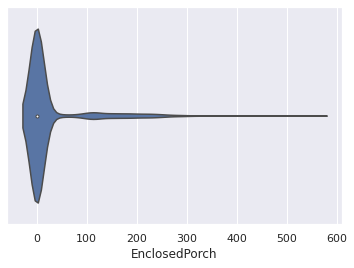

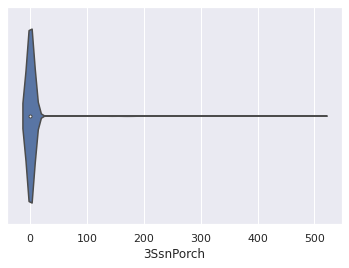

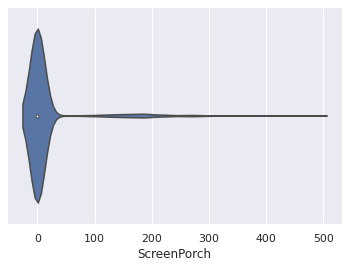

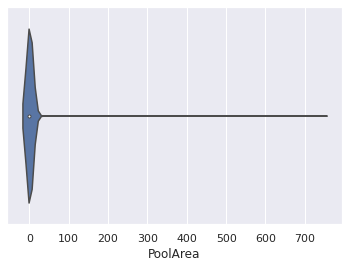

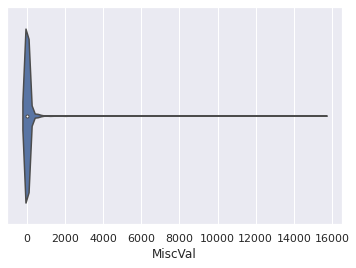

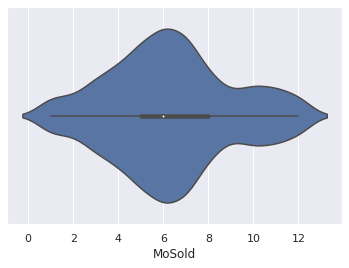

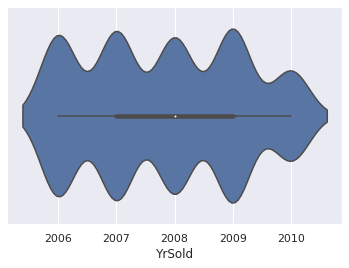

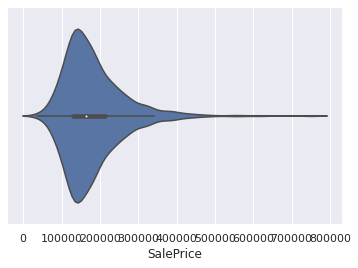

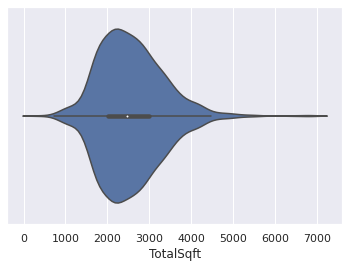

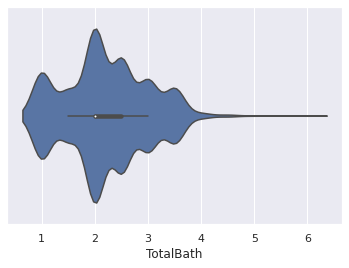

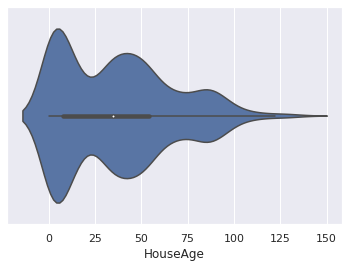

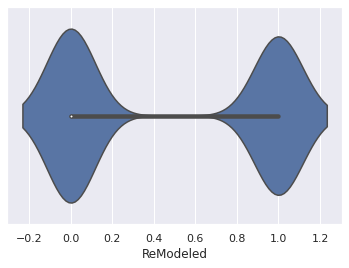

In [13]:
cols = dataset_numeric.columns

for c in cols:
  sns.violinplot(x=dataset_numeric[c])
  plt.xlabel(c)
  plt.show()

Looking at the above graphs, we can see that there are several data point that are negatively skewed to the left side of the distribution (ex: LotFrontage, LotArea, MasVnrArea, etc.). We would want to decrease the skew and make it closer to normal distribution.

In [14]:
# Skew Correction
#log1p function applies log(1+x) to all elements of the column
skew = df_train.select_dtypes(include=numerics).skew()

# disabling the pandas warning
pd.options.mode.chained_assignment = None

skewedfeatures = [s for s in skew if(s > 5.0)]
skewedfeatures

for skf in skewedfeatures:
  sk = skew[skew == skf].index[0]
  df_train[sk] = np.log1p(df_train[sk])

In [15]:
# Skew Correction for test set
#log1p function applies log(1+x) to all elements of the column
skew = df_test.select_dtypes(include=numerics).skew()

# disabling the pandas warning
pd.options.mode.chained_assignment = None

skewedfeatures = [s for s in skew if(s > 5.0)]
skewedfeatures

for skf in skewedfeatures:
  sk = skew[skew == skf].index[0]
  df_test[sk] = np.log1p(df_test[sk])

### Checking correlation betwenn numeric values

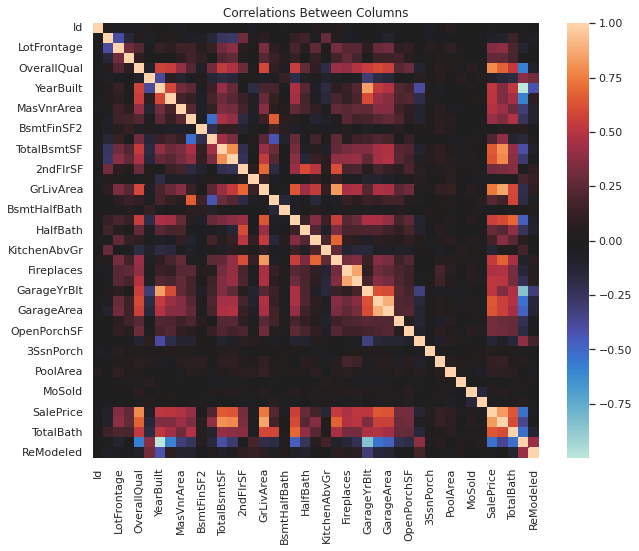

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset_numeric.corr(), center = 0)
plt.title("Correlations Between Columns")
plt.show()

In [17]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

# Calculates pearson co-efficient for all combinations
data_corr = dataset_numeric.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

size = 36

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

GarageCars and GarageArea = 0.89
Fireplaces and FireplaceQu = 0.86
YearBuilt and GarageYrBlt = 0.84
GrLivArea and TotRmsAbvGrd = 0.83
TotalBsmtSF and 1stFlrSF = 0.80
2ndFlrSF and GrLivArea = 0.69
BedroomAbvGr and TotRmsAbvGrd = 0.68
BsmtFinSF1 and BsmtFullBath = 0.66
GrLivArea and FullBath = 0.64
GarageYrBlt and GarageCars = 0.62
2ndFlrSF and TotRmsAbvGrd = 0.61
2ndFlrSF and HalfBath = 0.61
YearRemodAdd and GarageYrBlt = 0.60
GarageYrBlt and GarageArea = 0.60
OverallQual and GarageCars = 0.60
YearBuilt and YearRemodAdd = 0.59
OverallQual and GrLivArea = 0.59
OverallQual and YearBuilt = 0.57
OverallQual and GarageArea = 0.56
OverallQual and GarageYrBlt = 0.55
FullBath and TotRmsAbvGrd = 0.55
OverallQual and YearRemodAdd = 0.55
OverallQual and FullBath = 0.55
OverallQual and TotalBsmtSF = 0.54
GrLivArea and BedroomAbvGr = 0.54
YearBuilt and GarageCars = 0.54
1stFlrSF and GrLivArea = 0.53
BsmtFinSF1 and BsmtUnfSF = -0.52
2ndFlrSF and BedroomAbvGr = 0.50


From the above data, we can see that GarageCars and GarageArea are highly correlated. To limit the noise in our data set, we will make sure not to include GarageCars in our models.

### Create Dummy Variables for Categorical Data

In [18]:
dum_vars = ['Neighborhood', 'MSZoning', 'MSSubClass', 'Street', 
            'LotShape', 'LotConfig','Utilities', 'LandSlope', 
            'BldgType', 'HouseStyle', 'RoofStyle', 'Foundation', 
            'Heating', 'CentralAir', 'PavedDrive', 'MoSold', 
            'YrSold', 'SaleType', 'SaleCondition']

In [19]:
for col in dum_vars:
  print(col)
  train = sorted(df_train[col].unique().tolist())
  test = sorted(df_test[col].unique().tolist())
  total = set(train + test)
  df_train[col] = pd.Categorical(df_train[col], categories=total)
  df_test[col] = pd.Categorical(df_test[col], categories=total)

Neighborhood
MSZoning
MSSubClass
Street
LotShape
LotConfig
Utilities
LandSlope
BldgType
HouseStyle
RoofStyle
Foundation
Heating
CentralAir
PavedDrive
MoSold
YrSold
SaleType
SaleCondition


## Modeling

### Lasso Regression
Lasso stands for Least Absolute Shrinkage and Selection Operator, which is another form of linear regression. Lasso regression shrinks data values toward a central point, such as the mean, which produces simple, sparse models. You can feed several different features into this model and it will automatically filter out the noise within the data. One potential issue that can happen using a Lasso model is that it takes the human element out of the model, which can change the logic of the model and create bias. Lasso uses L1 regularization technique, which penalizes a model based on the sum of the absolute coefficient values.

For this example, I will be running several different features through a Lasso model and see what it predicts.

In [20]:
# Feature(s) to look at
f1 = ['MSSubClass', 'LotFrontage', 'LotArea',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
    'TotalSqft', 'TotalBath', 'HouseAge', 'ReModeled']

# Run a Linear Regression using the feature(s)
x1 = df_train[f1]
y = df_train['SalePrice']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x1, y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1093, 35), (365, 35), (1093,), (365,))

Sklearn has two different Lasso models:
- [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html): is a linear model
- [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html): iterative model that allows you to pass a list of alphas to find the optimal parameters through cross validation.

I will be using LassoCV so I can optimize alpha by using numpy to create equally spaced values between a logarithmic scale.


In [21]:
# Set up model
lasso = LassoCV(n_alphas=200, alphas=np.logspace(0, 4, 100), max_iter = 1000)
kf = KFold(n_splits=7, shuffle=True)

# Standardize the data
ss = StandardScaler()
ss_train = ss.fit_transform(x_train)
ss_test = ss.transform(x_test)

# cross validate 
scores = cross_val_score(lasso, ss_train, y_train, cv=kf)
print(scores)
print(f'Mean Score: {scores.mean()}; SD: {scores.std()}')


lasso.fit(ss_train, y_train)
print(f'TRAIN Score: {lasso.score(ss_train, y_train)}')
print(f'TEST Score: {lasso.score(ss_test, y_test)}')

pred = lasso.predict(ss_test)
b, m = np.polynomial.polynomial.polyfit(y_test, pred, 1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1004281503.3218994, tolerance: 445743975.7985043
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2337877061.573242, tolerance: 445743975.7985043
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3472665492.1655273, tolerance: 445743975.7985043
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5200865309

[0.86706761 0.82451163 0.83891394 0.82709651 0.82337317 0.85778423
 0.86106306]
Mean Score: 0.8428300223482489; SD: 0.017405024580997356


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42169554450.03662, tolerance: 562129639.4423667
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42229662218.76538, tolerance: 562129639.4423667
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42266978099.40662, tolerance: 562129639.4423667
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42288798709.

TRAIN Score: 0.8637512187473207
TEST Score: 0.8695449351844551


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73261265180.1153, tolerance: 564785983.3400648
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73837186626.91302, tolerance: 564785983.3400648
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74289808084.62347, tolerance: 564785983.3400648
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74645483557.7

The ConvergenceWarning is a bit overwhelming, but I didn’t want to suppress it as we should want to know if the model is not fit optimally. Digging into the logs, you can see that when the model is optimized, the mean score is around .854 with a standard deviation around +-1.47.


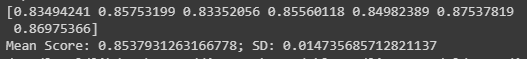



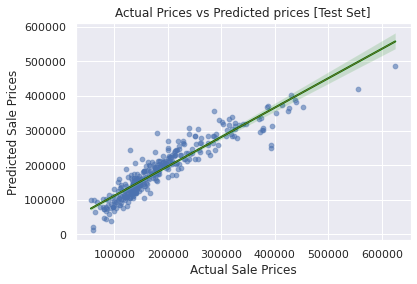

In [22]:
# Visualize the model results
sns.scatterplot(x=y_test, y=pred, alpha=0.4)
sns.regplot(x=y_test, y=pred, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, 
            line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(x=np.unique(y_test), y=np.unique(np.poly1d(b + m * np.unique(y_test))), linewidth=0.5, color='r')

plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual Prices vs Predicted prices [Test Set]")
 
plt.show()

#### Export Prediction
The below code runs the lasso regression model against the full test data set, it then generates the prediction file called ‘lasso_submission.csv’. This is then submitted to Kaggle to see where it ranks among my peers.

In [23]:
holdout_df = df_test[f1]

# Standardize the numeric columns
ss = StandardScaler()
ss_holdout = ss.fit_transform(holdout_df)

# predict SalePrice
predict = lasso.predict(ss_holdout)
submit = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predict})
submit

#export to csv
submit.to_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/lasso_submission.csv',index=False)

#### Results
The Lasso regression proved to be more efficient than my multiple linear regression submission to Kaggle by 0.25 points.

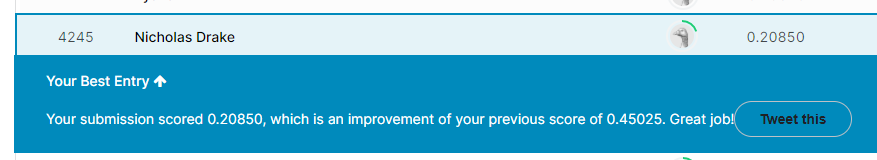

### Ridge Regression
Ridge regression is a regularized version of Linear Regression that reduces model variance while increasing model bias, which generate more accurate predictions. Ridge regression shrinks the dimensions of the data by the same proportions. It also uses L2 regularization technique, which penalizes a model based on the sum of the squared coefficient values.

In [24]:
# Feature(s) to look at
f2 = ['MSSubClass', 'LotFrontage', 'LotArea',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
    'TotalSqft', 'TotalBath', 'HouseAge', 'ReModeled']

# Run a Linear Regression using the feature(s)
x2 = df_train[f2]
y = df_train['SalePrice']

# Split the data
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y)
x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape

((1093, 35), (365, 35), (1093,), (365,))

In [25]:
# Set up model
ridge_reg = Ridge(alpha=1, solver="cholesky")
kf = KFold(n_splits=7, shuffle=True)

# Standardize the data
ss = StandardScaler()
ss_train2 = ss.fit_transform(x2_train)
ss_test2 = ss.transform(x2_test)

# cross validate 
scores = cross_val_score(ridge_reg, ss_train2, y2_train, cv=kf)
print(scores)
print(f'Mean Score: {scores.mean()}; SD: {scores.std()}')


ridge_reg.fit(ss_train2, y2_train)
print(f'TRAIN Score: {ridge_reg.score(ss_train2, y2_train)}')
print(f'TEST Score: {ridge_reg.score(ss_test2, y2_test)}')

pred2 = ridge_reg.predict(ss_test2)
b, m = np.polynomial.polynomial.polyfit(y2_test, pred2, 1)

[0.85056406 0.82362488 0.86869381 0.86704844 0.85695399 0.84194093
 0.84142967]
Mean Score: 0.8500365410459746; SD: 0.014749433621645946
TRAIN Score: 0.86739030576073
TEST Score: 0.8635047689406703


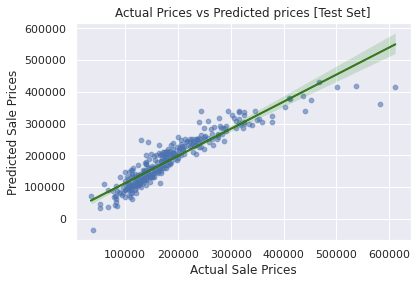

In [26]:
# Visualize the model results
sns.scatterplot(x=y2_test, y=pred2, alpha=0.4)
sns.regplot(x=y2_test, y=pred2, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, 
            line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(x=np.unique(y2_test), y=np.unique(np.poly1d(b + m * np.unique(y2_test))), linewidth=0.5, color='r')

plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual Prices vs Predicted prices [Test Set]")
 
plt.show()

#### Export Prediction
The below code runs the Ridge regression model against the full test data set, it then generates the prediction file called ‘ridge_submission.csv’. This is then submitted to Kaggle to see where it ranks among my peers.

In [27]:
holdout_df2 = df_test[f2]

# Standardize the numeric columns
ss = StandardScaler()
ss_holdout2 = ss.fit_transform(holdout_df2)

# predict SalePrice
predict2 = ridge_reg.predict(ss_holdout2)
submit2 = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predict2})
submit2

#export to csv
submit2.to_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/ridge_submission.csv',index=False)

#### Results
The Ridge regression submission was slightly better than my Lasso regression by .01

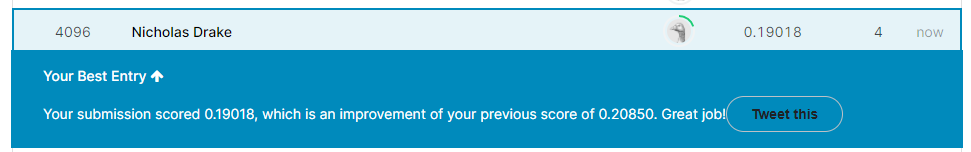

### Elastic Net Regression
Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training. It combines the lasso and ridge models techniques by using both L1 and L2 regularization.

In [28]:
# Feature(s) to look at
f3 = ['MSSubClass', 'LotFrontage', 'LotArea',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
    'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
    'TotalSqft', 'TotalBath', 'HouseAge', 'ReModeled']

# Run a Linear Regression using the feature(s)
x3 = df_train[f3]
y = df_train['SalePrice']

# Split the data
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y)
x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape

((1093, 35), (365, 35), (1093,), (365,))

Similar to LassoCV, sklearn has a [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html) model that allows us to tune the parameters to determine the optimal alpha by passing a list.

In [29]:
# Set up model
e_net = ElasticNetCV(n_alphas=200, alphas=np.logspace(0, 4, 100), max_iter = 1000)
kf = KFold(n_splits=7, shuffle=True)

# Standardize the data
ss = StandardScaler()
ss_train3 = ss.fit_transform(x3_train)
ss_test3 = ss.transform(x3_test)

# cross validate 
scores = cross_val_score(e_net, ss_train3, y3_train, cv=kf)
print(scores)
print(f'Mean Score: {scores.mean()}; SD: {scores.std()}')


e_net.fit(ss_train3, y3_train)
print(f'TRAIN Score: {e_net.score(ss_train3, y3_train)}')
print(f'TEST Score: {e_net.score(ss_test3, y3_test)}')

pred3 = e_net.predict(ss_test3)
b, m = np.polynomial.polynomial.polyfit(y3_test, pred3, 1)

[0.78973553 0.88137321 0.83503454 0.86425833 0.83861337 0.86339468
 0.8103975 ]
Mean Score: 0.8404010219943819; SD: 0.029942319238948557
TRAIN Score: 0.8509697466667927
TEST Score: 0.8221283512727858


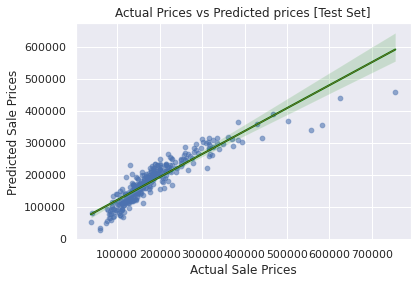

In [30]:
# Visualize the model results
sns.scatterplot(x=y3_test, y=pred3, alpha=0.4)
sns.regplot(x=y3_test, y=pred3, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, 
            line_kws={'color':'green', 'linewidth': 2})
sns.lineplot(x=np.unique(y3_test), y=np.unique(np.poly1d(b + m * np.unique(y3_test))), linewidth=0.5, color='r')

plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual Prices vs Predicted prices [Test Set]")
 
plt.show()

#### Export Prediction
The below code runs the elastic net regression model against the full test data set, it then generates the prediction file called ‘elasticnet_submission.csv’. This is then submitted to Kaggle to see where it ranks among my peers.

In [31]:
holdout_df3 = df_test[f3]

# Standardize the numeric columns
ss = StandardScaler()
ss_holdout3 = ss.fit_transform(holdout_df3)

# predict SalePrice
predict3 = e_net.predict(ss_holdout3)
submit3 = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predict3})
submit3

#export to csv
submit3.to_csv('./drive/MyDrive/Colab Notebooks/House_Price_EDA/elasticnet_submission.csv',index=False)

#### Results
The Elastic Net regression submission was my best submission and improved my score by .03

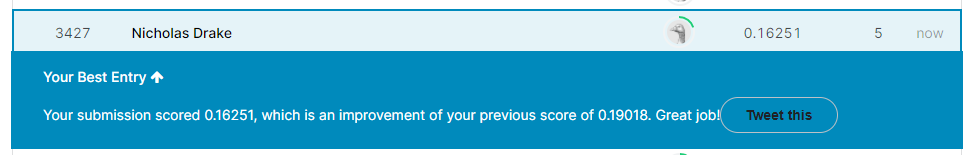